# Проверка гипотез по увеличению выручки в интернет-магазине

# Часть 1. Приоритизация гипотез

**Шаг 1.1.**      Импортируем необходимые библиотеки, которые могут пригодиться для исследования, и после этого выгрузим данные из файла hypothesis.csv в таблицу **hypothesis**.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Текст в столбце с гипотезами не виден полностью. Также желательно названия колонок писать в нижнем регистре. Исправим это:

In [3]:
pd.set_option('max_colwidth', 120) # увеличили максимальную ширину колонок
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Шаг 1.2.** Применим фреймворк ICE для приоритизации гипотез.

In [4]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']).round(1) 
ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
# отсортировали в порядке убывания значения ICE и сразу округлили значения ICE
ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


**Шаг 1.3.** Теперь применим фреймворк RICE:

In [5]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
# отсортировали в порядке убывания значения RICE
RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Шаг 1.4.**  Сравним приоритизацию гипотез:

Объединим таблицы RICE и ICE для более наглядного сравнения:

In [6]:
total = ICE.merge(RICE, left_on='hypothesis', right_on='hypothesis').sort_values(by=['RICE'], ascending=False)
total

,hypothesis,ICE,RICE
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112.0
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
0,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9.0
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0


При применении RICE вместо ICE для приоритизации гипотез очень сильно изменился порядок приоритетности (только **гипотеза 5** "*Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей*" и **гипотеза 7** "*Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию*" не изменили приоритетности).

Причиной изменения приоритетности является использование параметра **reach** во фреймфорке RICE, поскольку он отображает охват пользователей. Таким образом, **гипотеза 8** "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*" с параметром **reach** = 10 стала более приоритетной, чем **гипотеза 9** "*Запустить акцию, дающую скидку на товар в день рождения*", у которой **reach** = 1. 

**Вывод по части 1**

В первой части исследования были изучены и приоритизированы гипотезы, направленные на увеличение выручки интернет-магазина. Для этого использовались фреймворки ICE и RICE. 

При использовании фреймворка ICE наивысший приоритет получила  **гипотеза 9** "*Запустить акцию, дающую скидку на товар в день рождения*".

При использовании фреймворка RICE наивысший приоритет получила  **гипотеза 8** "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*".

Поскольку фреймворк RICE учитывает охват пользователей, то его применение в нашем исследовании более желательно. Таким образом, приоритетной гипотезой, направленной на увеличение выручки примем **гипотезу 8**.

# Часть 2. Анализ A/B-теста

**Шаг 2.1.**  Выгрузим данные из файлов orders.csv и visitors.csv и проверим их.

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В обеих таблицах столбцы date приведем к типу datetime.

In [12]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Теперь проверим таблицы на наличие дубликатов:

In [15]:
orders.duplicated().sum()

0

In [16]:
visitors.duplicated().sum()

0

Дубликатов не обнаружено.

Проверим, что во всех таблицах даты и группы внесены корректно.

In [17]:
min_date_orders = orders['date'].min()
max_date_orders = orders['date'].max()
min_date_orders

Timestamp('2019-08-01 00:00:00')

In [18]:
max_date_orders

Timestamp('2019-08-31 00:00:00')

In [19]:
min_date_visitors = visitors['date'].min()
max_date_visitors = visitors['date'].max()
min_date_visitors

Timestamp('2019-08-01 00:00:00')

In [20]:
max_date_visitors

Timestamp('2019-08-31 00:00:00')

In [21]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [22]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Крайние даты в обеих таблицах таблицах совпадают: сведения с 1 августа 2019 года по 31 августа 2019 года.

Группы в обеих таблицах тоже совпадают: группа A и группа B.

Проверим, не попадают ли какие-либо пользователи в обе группы одновременно. Для этого разделим таблицу orders на 2 таблицы по группам A и B.

In [23]:
group_a = orders.loc[orders['group'] == 'A']
group_a

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
10,3649131742,879864040,2019-08-15,4008,A
12,2809384911,3213223594,2019-08-15,7370,A
...,...,...,...,...,...
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [24]:
group_b = orders.loc[orders['group'] == 'B']
group_b

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B


In [25]:
a = group_a['visitorId']
b = group_b['visitorId']
set(a) & set(b)

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

Мы получили достаточно большое количество посетителей, которые попали одновременно в 2 группы. Однако, поскольку мы в анализе изучаем непосредственно транзакции, то этот факт никак не повлияет на дальнейший анализ.

Таблицы готовы для проведения анализа A/B-теста.

**Шаг 2.2.** Построим график кумулятивной выручки по группам.

Для этого сначала получим кумулятивные данные, используя сведения из таблиц orders и visitors:

In [26]:
# создаем массив уникальных пар значений дат и групп теста
datesgroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_agg = datesgroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_agg = datesgroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cum_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cum_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cum_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Теперь можно построить графики:

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cum_revenue_a = cum_data[cum_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cum_revenue_b = cum_data[cum_data['group']=='B'][['date','revenue', 'orders']]

# объединим эти датафреймы
cum_total_revenue = cum_revenue_a.merge(cum_revenue_b, left_on='date', right_on='date')
cum_total_revenue.columns = ['date', 'revenue_a', 'orders_a', 'revenue_b', 'orders_b']
cum_total_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


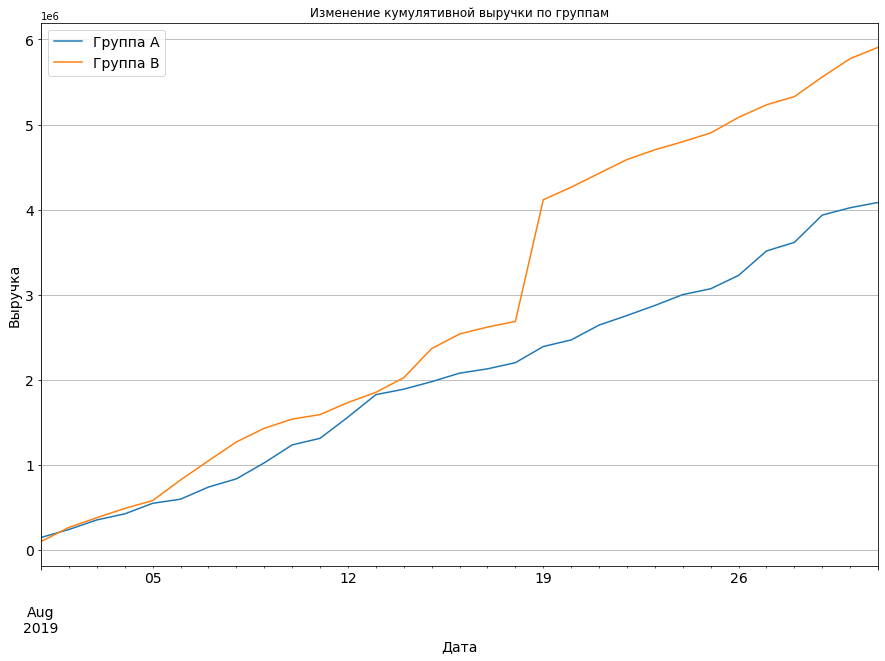

In [28]:
cum_total_revenue.plot(x='date', y=['revenue_a', 'revenue_b'], figsize=(15,10), grid = True, fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.title('Изменение кумулятивной выручки по группам')
plt.legend(['Группа A','Группа B'], fontsize=14)
plt.show()

Как видно из графика, выручка в группе A на изучаемом периоде растет достаточно равномерно, в то время как выручка в группе B резко выросла 19 августа, что может быть связано с **аномально большой покупкой** в этот день одним из пользователей, попавшим в эту группу, либо **резким ростом числа заказов** в этот день в этой группе.

**Шаг 2.3.** Построим график кумулятивного среднего чека по группам.

Воспользуемся данными из таблицы *cum_total_revenue*, чтобы определить средний чек.

In [29]:
cum_total_revenue['a_mean'] = (cum_total_revenue['revenue_a']/cum_total_revenue['orders_a']).round(1)
cum_total_revenue['b_mean'] = (cum_total_revenue['revenue_b']/cum_total_revenue['orders_b']).round(1)
cum_total_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b,a_mean,b_mean
0,2019-08-01,148579,24,101217,21,6190.8,4819.9
1,2019-08-02,242401,44,266748,45,5509.1,5927.7
2,2019-08-03,354874,68,380996,61,5218.7,6245.8
3,2019-08-04,425699,84,489567,78,5067.8,6276.5
4,2019-08-05,549917,109,581995,101,5045.1,5762.3


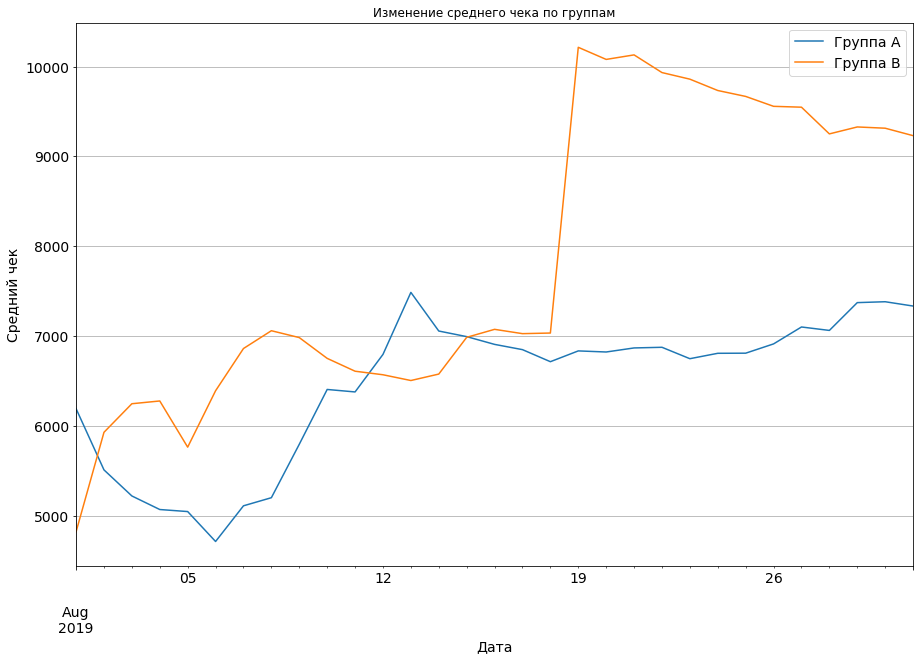

In [30]:
cum_total_revenue.plot(x='date', y=['a_mean', 'b_mean'], figsize=(15,10), grid = True, fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.title('Изменение среднего чека по группам')
plt.legend(['Группа A','Группа B'], fontsize=14)
plt.show()

Как видно по рисунку, в группе A размер среднего чека с 1 по 6 августа заметно снижался, после чего до 13 августа увеличивался, а затем до конца августа незначительно колебался около 7000. В группе B размер среднего чека не был достаточно стабильным на протяжении всего августа: с 1 по 4 число рос примерно от 5000 до 6200, 5 августа - снизился примерно до 5800, к 8 августа снова вырос примерно до 7000, к 13 августа снизился до 6500, а затем 19 августа превысил 10000, после чего равномерно снижался к 9000 до конца месяца. Таким образом, 19 августа действительно была совершена аномально большая покупка в группе B.

**Шаг 2.4.** Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [31]:
cum_total_revenue['relation'] = (cum_total_revenue['b_mean']/cum_total_revenue['a_mean'])-1
cum_total_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b,a_mean,b_mean,relation
0,2019-08-01,148579,24,101217,21,6190.8,4819.9,-0.221441
1,2019-08-02,242401,44,266748,45,5509.1,5927.7,0.075983
2,2019-08-03,354874,68,380996,61,5218.7,6245.8,0.196811
3,2019-08-04,425699,84,489567,78,5067.8,6276.5,0.238506
4,2019-08-05,549917,109,581995,101,5045.1,5762.3,0.142158


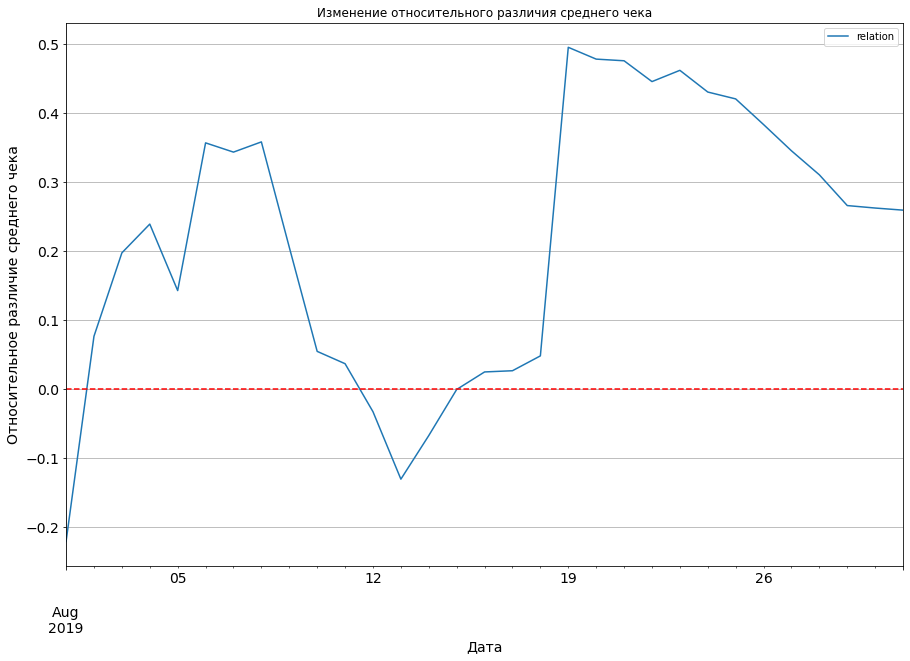

In [32]:
# cтроим отношение средних чеков
cum_total_revenue.plot(x='date', y='relation', figsize=(15,10), grid = True, fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Относительное различие среднего чека', fontsize=14)
plt.title('Изменение относительного различия среднего чека')
plt.axhline(y=0, color='red', linestyle='--') 
plt.show()

Относительное различие среднего чека между группами A и B сильно изменяется практически на протяжении всего месяца. Таким образом мы точно имеем выбросы. С ними разберемся в дальнейшем.

**Шаг 2.5.** Построим график кумулятивной конверсии по группам.

In [33]:
# считаем кумулятивную конверсию
cum_data['conversion'] = cum_data['buyers']/cum_data['visitors']

# отделяем данные по группе A
cum_con_a = cum_data[cum_data['group']=='A'][['date','conversion']]

# отделяем данные по группе B
cum_con_b = cum_data[cum_data['group']=='B'][['date','conversion']]

# объединим данные по конверсии в одной таблице
cum_total_conversion = cum_con_a.merge(cum_con_b, left_on='date', right_on='date')
cum_total_conversion.columns = ['date', 'conversion_a', 'conversion_b']
cum_total_conversion.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.027816,0.028050
1,2019-08-02,0.028401,0.033230
2,2019-08-03,0.033604,0.032723
3,2019-08-04,0.030055,0.029149
4,2019-08-05,0.030139,0.029878


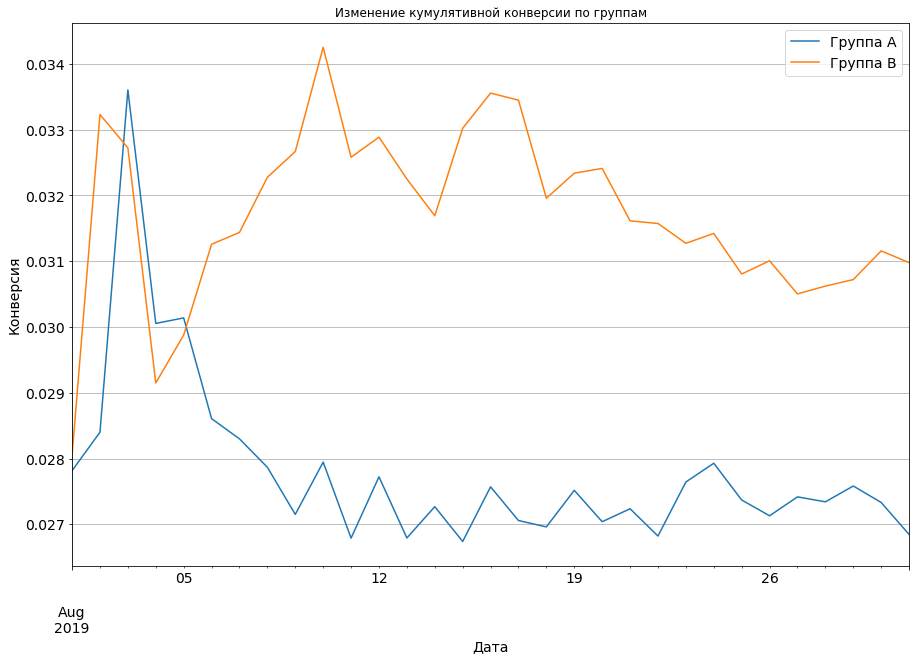

In [34]:
cum_total_conversion.plot(x='date', y=['conversion_a', 'conversion_b'], figsize=(15,10), grid = True, fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Конверсия', fontsize=14)
plt.title('Изменение кумулятивной конверсии по группам')
plt.legend(['Группа A','Группа B'], fontsize=14)
plt.show()

Как видно по графику, до 10го августа кумулятивная конверсия в обеих группах достаточно сильно колебалась, но после 10го августа в группе A конверсия практически стабилизировалась, а в группе B - еще немного колебалась, но при этом относительно равномерно снижалась до 25го августа, после чего практически стабилизировалась. 

Конверсия в покупателей у группы B заметно выше, чем у группы A.

**Шаг 2.6.** Построим график относительного изменения кумулятивной конверсии группы B к группе A.

Сначала посчитаем относительное изменение:

In [35]:
cum_total_conversion['relation'] = (cum_total_conversion['conversion_b']/cum_total_conversion['conversion_a'])-1
cum_total_conversion.head()

,date,conversion_a,conversion_b,relation
0,2019-08-01,0.027816,0.028050,0.008415
1,2019-08-02,0.028401,0.033230,0.170056
2,2019-08-03,0.033604,0.032723,-0.026220
3,2019-08-04,0.030055,0.029149,-0.030138
4,2019-08-05,0.030139,0.029878,-0.008646


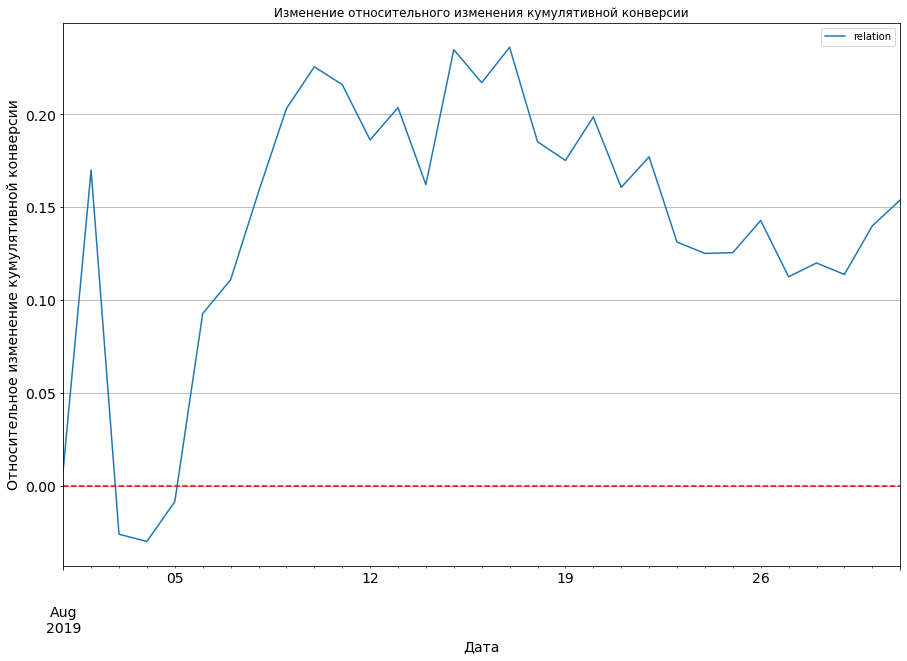

In [36]:
cum_total_conversion.plot(x='date', y='relation', figsize=(15,10), grid = True, fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Относительное изменение кумулятивной конверсии', fontsize=14)
plt.title('Изменение относительного изменения кумулятивной конверсии')
plt.axhline(y=0, color='red', linestyle='--') 
plt.show()

Как видно по графику, только с 3го по 5ое августа кумулятивная конверсия в группе A была выше кумулятивной конверсии в группе B. 

После 24го августа относительное изменение кумулятивной конверсии становится достаточно стабильным.

**Шаг 2.7.** Построим точечный график количества заказов по пользователям.

Для этого воспользуемся таблицей *orders*:

In [37]:
orders_by_users = orders.groupby('visitorId', as_index = False).agg({'transactionId': 'nunique'})
orders_by_users.sort_values(by='transactionId', ascending=False).head(20)

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Судя по таблице, у нас есть 2 пользователя с 11 заказами, по одному пользователю с 9 и 8 заказами и по несколько пользователей с 5 и 4 заказами.

Это очень необычно, поскольку за месяц сделать так много заказов может очень малое количество клиентов. 

Визуализируем это с помощью гистограммы, а затем и с помощью точечной диаграммы.

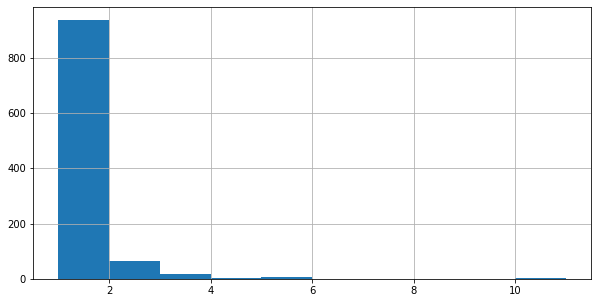

In [38]:
orders_by_users['transactionId'].hist(figsize=(10,5))
plt.show()

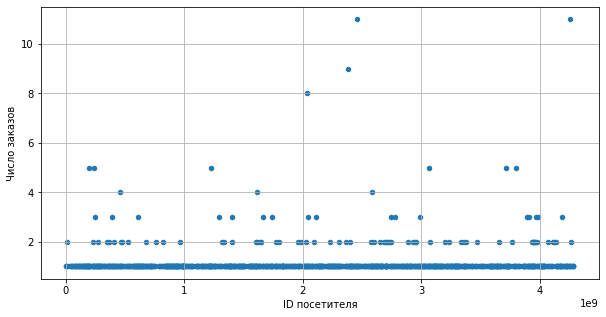

In [39]:
orders_by_users.plot(x='visitorId', y='transactionId', kind='scatter', grid=True, figsize=(10,5))
plt.xlabel('ID посетителя')
plt.ylabel('Число заказов')
plt.show()

Как видно по гистограмме и точечному графику, основная часть пользователей совершила от одного до двух заказов за месяц; от трех и свыше - гораздо меньшая часть. 

На следующем шаге выберем границу определения аномальных пользователей.

**Шаг 2.8.** Посчитаем 95-й и 99-й перцентили количества заказов на пользователя для определения "границы аномальности".

In [40]:
print(np.percentile(orders_by_users['transactionId'], [95, 99]))

[2. 4.]


**Менее 1%** пользователей совершили **от 4 заказов и больше**.

**Менее 5%** пользователей совершили **больше 2 заказов**.

Таким образом будем считать, что все пользователи, которые совершили **от 3 заказов и больше**, являются "аномальными".

**Шаг 2.9.** Построим точечный график стоимостей заказов.

Также можно представить еще и гистограмму распределения стоимостей заказов.

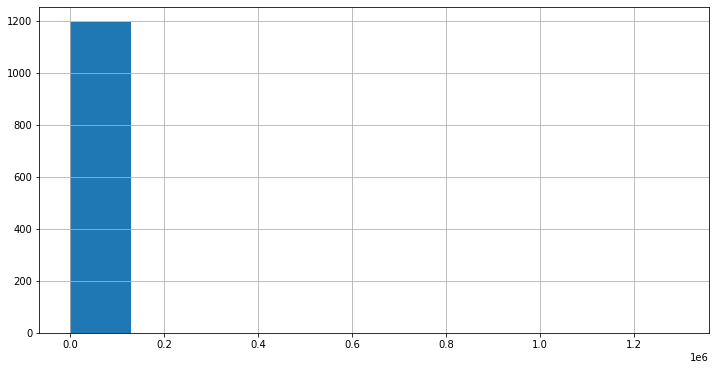

In [41]:
orders['revenue'].hist(figsize=(12,6))
plt.show()

В таком виде невозможно понять, как примерно распределены стоимости заказов, поскольку мы явно имеем выбросы. Изменим масштаб:

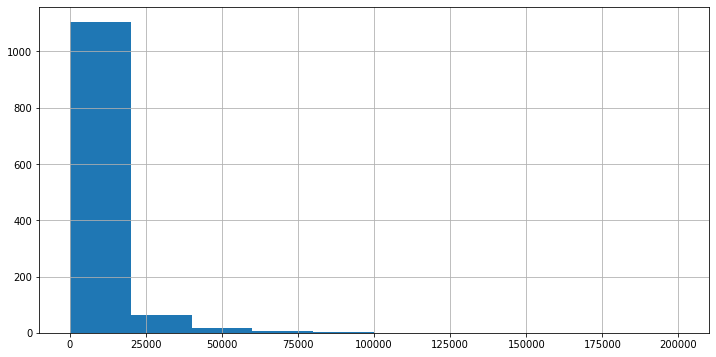

In [42]:
orders['revenue'].hist(figsize=(12,6), range=(0,200000))
plt.show()

Теперь картина более ясная - основная часть заказов по стоимости не превышает 50000. Рассмотрим теперь распределение стоимостей заказов на точечной диаграмме. 

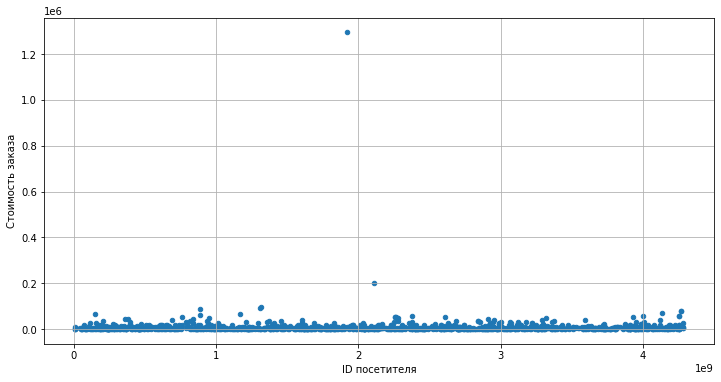

In [43]:
orders.plot(x='visitorId', y='revenue', kind='scatter', grid=True, figsize=(12,6))
plt.xlabel('ID посетителя')
plt.ylabel('Стоимость заказа')
plt.show()

Мы имеем следующие наиболее заметные выбросы:

1. Превышающий 1,2 млн;
2. Около 200000.

Ещё посмотрим на точечную диаграмму в другом масштабе:

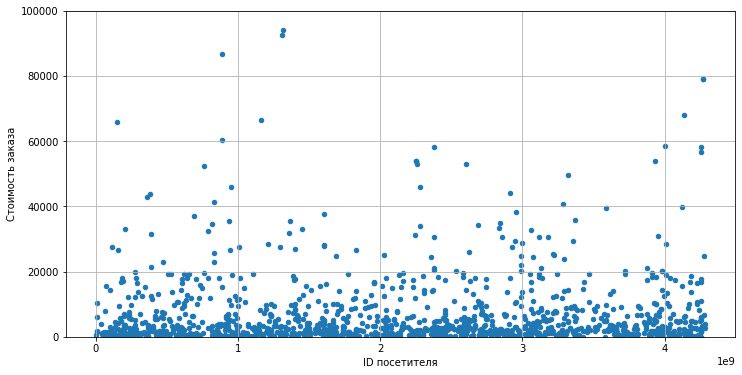

In [44]:
orders.plot(x='visitorId', y='revenue', kind='scatter', grid=True, figsize=(12,6))
plt.xlabel('ID посетителя')
plt.ylabel('Стоимость заказа')
plt.ylim(0,100000)
plt.show()

При более подробном рассмотрении можно отметить, что основная часть заказов по стоимости не превышает 20000.

На следующем шаге определим "границу аномальности стоимости заказа".

**Шаг 2.10.** Посчитаем 95-й и 99-й перцентили стоимости заказов для выбора границы определения аномальных заказов.

In [45]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Менее 1%** пользователей совершили заказ, стоимость которого **превышает 58233.2**.

**Менее 5%** пользователей совершили заказ, стоимость которого **больше 28000**.

Таким образом будем считать, что стоимость заказа **больше 28000 является аномальной**.

**Шаг 2.11.** Посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным.

На этом шаге и последующих для определения статистической значимости различий в конверсии или в среднем чеке заказа между группами будет использоваться **Непараметрический тест Уилкоксона-Манна-Уитни**, поскольку в представленных данных имеются выбросы, а данный тест использует ранжирование значений.

Сформулируем нулевую и альтернативную гипотезы:

* H0 - конверсии в группах А и В по "сырым" данным равны;
* H1 - конверсии в группах А и В по "сырым" данным отличаются.

Соберем все необходимые данные для анализа:

In [46]:
visitors_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a.columns = ['date', 'visitors_a']

visitors_cum_a = visitors_a.apply(lambda x: visitors_a[visitors_a['date'] <= x['date']].agg({'date':'max','visitors_a':'sum'}), axis=1,)
visitors_cum_a.columns = ['date', 'visitors_cum_a']

visitors_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b.columns = ['date', 'visitors_b']

visitors_cum_b = visitors_b.apply(lambda x: visitors_b[visitors_b['date'] <= x['date']].agg({'date':'max','visitors_b':'sum'}), axis=1,)
visitors_cum_b.columns = ['date', 'visitors_cum_b']

orders_a = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
orders_a.columns = ['date', 'orders_a', 'revenue_a']

orders_cum_a = orders_a.apply(lambda x: orders_a[orders_a['date'] <= x['date']].agg({'date': 'max', 'orders_a': 'sum', 'revenue_a': 'sum'}), axis=1,).sort_values(by=['date'])
orders_cum_a.columns = ['date','orders_cum_a','revenue_cum_a']

orders_b = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
orders_b.columns = ['date', 'orders_b', 'revenue_b']

orders_cum_b = orders_b.apply(lambda x: orders_b[orders_b['date'] <= x['date']].agg({'date': 'max', 'orders_b': 'sum', 'revenue_b': 'sum'}), axis=1,).sort_values(by=['date'])
orders_cum_b.columns = ['date','orders_cum_b','revenue_cum_b']

full_data = (orders_a.merge(orders_b, left_on='date', right_on='date', how='left')
    .merge(orders_cum_a, left_on='date', right_on='date', how='left')
    .merge(orders_cum_b, left_on='date', right_on='date', how='left')
    .merge(visitors_a, left_on='date', right_on='date', how='left')
    .merge(visitors_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cum_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cum_b, left_on='date', right_on='date', how='left'))

full_data.head()

,date,orders_a,revenue_a,orders_b,revenue_b,orders_cum_a,revenue_cum_a,orders_cum_b,revenue_cum_b,visitors_a,visitors_b,visitors_cum_a,visitors_cum_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [47]:
orders_by_visitors_a = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
orders_by_visitors_a.columns = ['userId', 'orders']

orders_by_visitors_b = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
orders_by_visitors_b.columns = ['userId', 'orders']

# Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов

sample_a = pd.concat([orders_by_visitors_a['orders'], pd.Series(0, index=np.arange(
                full_data['visitors_a'].sum() - len(orders_by_visitors_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat([orders_by_visitors_b['orders'], pd.Series(0, index=np.arange(
                full_data['visitors_b'].sum() - len(orders_by_visitors_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# порог статистической значимости - 5%
alpha = .05
p_value_full = stats.mannwhitneyu(sample_a, sample_b)[1]
print('p-value по "сырым" данным равно', "{0:.3f}".format(p_value_full))
if (p_value_full < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value по "сырым" данным равно 0.017
Отвергаем нулевую гипотезу


P-value по "сырым" данным меньше 5 %, поэтому отвергаем нулевую гипотезу "конверсии в группах А и В по "сырым" данным равны".

**Шаг 2.12.** Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным.

Сформулируем нулевую и альтернативную гипотезы:

* H0 - средние чеки в группах А и В по "сырым" данным равны;
* H1 - средние чеки в группах А и В по "сырым" данным отличаются.

Воспользуемся данными, полученными на предыдущем шаге:

In [48]:
# порог статистической значимости - 5%
alpha = .05
p_value_full_check = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value по "сырым" данным равно', "{0:.3f}".format(p_value_full_check))
if (p_value_full_check < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value по "сырым" данным равно 0.729
Не получилось отвергнуть нулевую гипотезу


P-value по "сырым" данным значительно больше 5 %, поэтому нулевую гипотезу отвергнуть не можем.

**Шаг 2.13.** Посчитаем статистическую значимость различий в конверсии между группами по "очищенным" данным.

Ранее на предыдущих шагах мы приняли, что пользователи, оформившие заказ более 2 раз или стоимостью свыше 28000, являются аномальными. Поэтому на следующих шагах исключим их из анализа и проверим, как изменятся результаты теста.

Сформулируем нулевую и альтернативную гипотезы:

* H0 - конверсии в группах А и В по "очищенным" данным равны;
* H1 - конверсии в группах А и В по "очищенным" данным отличаются.

Определим сначала, сколько пользователей оказались "аномальными":

In [49]:
users_anomaly = pd.concat(
    [
        orders_by_visitors_a[orders_by_visitors_a['orders'] > 2]['userId'],
        orders_by_visitors_b[orders_by_visitors_b['orders'] > 2]['userId'],
    ],
    axis=0,
)
expensive_orders = orders[orders['revenue'] > 28000]['visitorId']
abnormal_users = (
    pd.concat([users_anomaly, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormal_users.head(10)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
684     358944393
648     382846391
1189    393266494
68      457167155
68      611059232
dtype: int64

In [50]:
abnormal_users.shape[0]

74

"Аномальными" оказались **74 пользователя**. Они будут исключены из дальнейшего анализа.

In [51]:
# Объявим переменные sample_a_filt и sample_b_filt,
# в которых "отфильтрованным" пользователям из разных групп будет соответствовать количество заказов

sample_a_filt = pd.concat([orders_by_visitors_a[
            np.logical_not(orders_by_visitors_a['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                full_data['visitors_a'].sum() - len(orders_by_visitors_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filt = pd.concat([orders_by_visitors_b[
            np.logical_not(orders_by_visitors_b['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                full_data['visitors_b'].sum() - len(orders_by_visitors_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# порог статистической значимости - 5%
alpha = .05
p_value_filt = stats.mannwhitneyu(sample_a_filt, sample_b_filt)[1]
print('p-value по "очищенным" данным равно', "{0:.3f}".format(p_value_filt))
if (p_value_filt < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value по "очищенным" данным равно 0.013
Отвергаем нулевую гипотезу


Как и для "сырых" данных, так и для "очищенных" данных в данном случае нулевая гипотеза отвергается.

**Шаг 2.14.** Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным" данным.

Сформулируем нулевую и альтернативную гипотезы:

* H0 - средние чеки в группах А и В по "очищенным" данным равны;
* H1 - средние чеки в группах А и В по "очищенным" данным отличаются.

Также воспользуемся данными, полученными на предыдущем шаге:

In [52]:
# порог статистической значимости - 5%
alpha = .05
p_value_check_filt = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
print('p-value по "очищенным" данным равно', "{0:.3f}".format(p_value_check_filt))
if (p_value_check_filt < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value по "очищенным" данным равно 0.738
Не получилось отвергнуть нулевую гипотезу


По "очищенным" данным нам тоже не удалось отвергнуть нулевую гипотезу, как и в случае с "сырыми" данными для средних чеков.

**Шаг 2.15.** Решение по результатам теста.

В результате проведения теста получено следующее:

1. Статистическая значимость различий в конверсии между группами по "сырым" и "очищенным" данным **присутствует**.
2. Статистическая значимость различий в среднем чеке заказа между группами по "сырым" и "очищенным" данным **отсутствует**.

Таким образом, можно завершать A/B-тест.

В **группе B** кумулятивная конверсия получилась заметно выше, чем в группе A, к тому же имеется статистическая значимость различий в конверсии между этими группами. И в то же время нет статистической значимости различий в среднем чеке заказа между этими группами.

Конечный вывод - **результаты группы B лучше результатов группы A**.

# Вывод

В ходе выполнения проекта было выполнено следующее:

1. Проведена приоритизация гипотез, направленных на увеличение выручки интернет-магазина. Наивысший приоритет получила гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".
2. Проведен анализ результатов A/B-теста:
- определено изменение конверсий и средних чеков по группам в течение месяца;
- выявлены "аномальные" покупатели и стоимости заказов;
- определено наличие статистической значимости различий в конверсии между группами;
- определено отсутствие статистической значимости различий в среднем чеке заказа между группами.
3. Группа B определена "победителем" по результатам A/B-теста.
